In [1]:
import os
import json
import numpy as np
from matplotlib import pyplot as plt


In [2]:
exp_data = 'YLObj'
exp_ws = 'YLObj_img_all'

data_dir = '../data2'
workspace_dir = '../HZWJ'

ws_dir = os.path.join(workspace_dir, exp_ws)
data_dir = os.path.join(data_dir, exp_data)

val_dep_dir = os.path.join(ws_dir, "validation")
ori_dep_dir = os.path.join(data_dir, 'images', 'train')

val_dep_paths = [f for f in os.listdir(val_dep_dir) if os.path.isfile(os.path.join(val_dep_dir, f)) and "dep" in f]
ori_dep_paths = [f for f in os.listdir(ori_dep_dir) if os.path.isfile(os.path.join(ori_dep_dir, f)) and "dep" in f]


In [3]:
means = []
for idx in range(1, len(val_dep_paths)):
    val_dep_file = f"ngp_ep0050_{idx:04d}_depth.png"
    ori_dep_file = f"img_{idx:03d}_depth.npy"
    val_dep_path = os.path.join(val_dep_dir, val_dep_file)
    ori_dep_path = os.path.join(ori_dep_dir, ori_dep_file)

    if not os.path.isfile(val_dep_path) or not os.path.isfile(ori_dep_path):
        print(f"File with index [{idx:03d}] does not exists.")
        continue
    val_dep = plt.imread(val_dep_path)
    ori_dep = np.load(ori_dep_path)
    array_idxs_1 = (val_dep > 0.1)
    array_idxs_2 = (ori_dep > 0.1)
    array_idxs = array_idxs_1 * array_idxs_2
    scale_array = val_dep[array_idxs] / ori_dep[array_idxs]
    means.append(np.mean(scale_array))
means = np.array(means)

In [4]:
print(np.mean(means))
print(np.std(means))

0.6226546268540674
0.01594678522788275


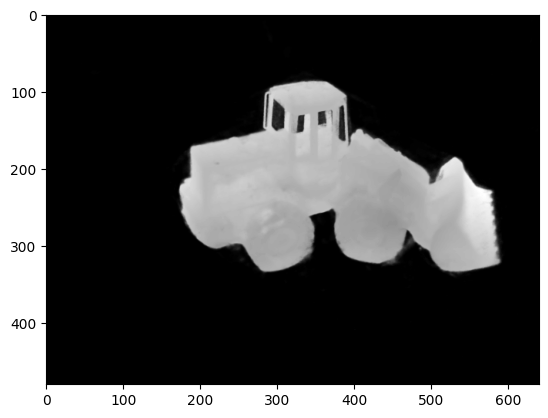

In [5]:
plt.imshow(val_dep,cmap="gray")

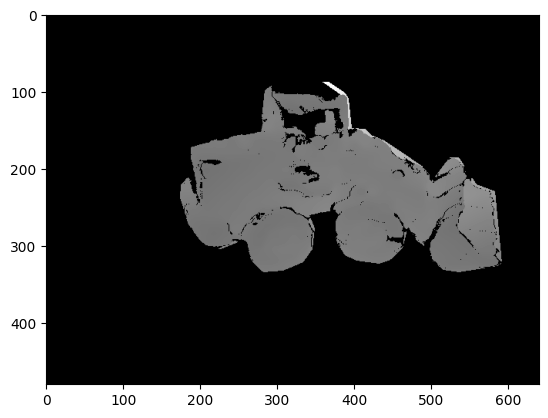

In [6]:
plt.imshow(ori_dep,cmap="gray")